In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [12]:
def equalize_hist(image,L=256):
  #calculating Pn relative frequencies
  brightness , count = np.unique(image,return_counts=True)
  #number of pixels
  w,h=image.shape
  n=w*h

  #frequencies
  fs=[]
  for ni in count:
    fs.append(ni/n)

  # now we shall calculate cdf
  cdf=[]
  tmp=0
  for i,b in enumerate(fs):
    tmp=tmp+b
    cdf.append(tmp)

  summation=dict(zip(brightness, cdf))
  #now we can use cdf to calculate equalized hist
  img=np.zeros_like(image)
  for (h,w),x in np.ndenumerate(image):
    img[h][w]=np.floor((L-1)*summation[x])

  return img


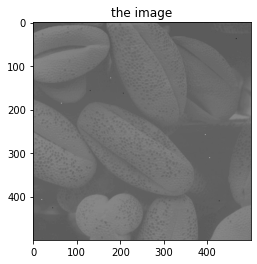

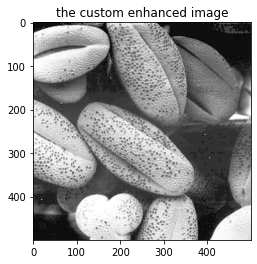

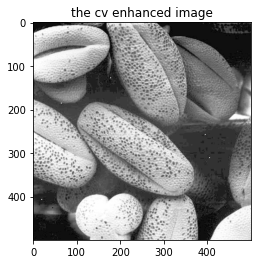

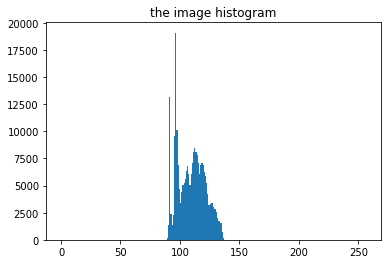

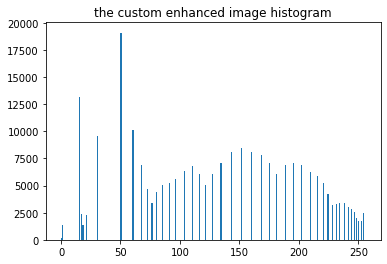

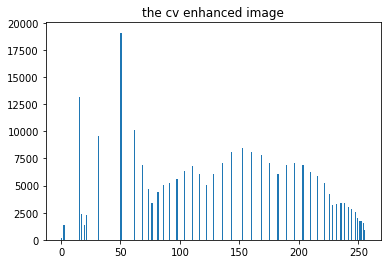

In [17]:
image=cv2.imread("example.jpg",cv2.IMREAD_GRAYSCALE)
#everything is clear
# enhanced_image, hist2=histogram_stretching(image,avoid=False)

plt.imshow(image,cmap='gray')
plt.title('the image')
plt.show()


plt.imshow(equalize_hist(image),cmap='gray')
plt.title('the custom enhanced image')
plt.show()


plt.imshow(cv2.equalizeHist(image),cmap='gray')
plt.title('the cv enhanced image')
plt.show()


plt.hist(image.ravel(),256,[0,256])
plt.title('the image histogram')
plt.show()


plt.hist(equalize_hist(image).ravel(),256,[0,256])
plt.title('the custom enhanced image histogram')
plt.show()


plt.hist(cv2.equalizeHist(image).ravel(),256,[0,256])
plt.title('the cv enhanced image')
plt.show()